In [85]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('assignment2_cleanInfile.csv')
df.head(20)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.600000,13,44.0,13,14,20.000000,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.000000,0
1,2,7.4,25.1,0.000000,14,44.0,6,15,4.000000,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.000000,0
2,2,12.9,25.7,0.000000,15,46.0,13,15,19.000000,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.000000,0
3,2,9.2,28.0,0.000000,4,24.0,9,0,11.000000,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.000000,0
4,2,17.5,32.3,1.000000,13,41.0,1,7,7.000000,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.000000,0
5,2,14.6,29.7,0.200000,14,56.0,13,13,19.000000,24.0,55.0,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,0.000000,0
6,2,14.3,25.0,0.000000,13,50.0,12,13,20.000000,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.503167,18.1,24.6,0.000000,0
7,2,7.7,26.7,0.000000,13,35.0,10,13,6.000000,17.0,48.0,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,0.000000,0
8,2,9.7,31.9,0.000000,6,80.0,9,7,7.000000,28.0,42.0,9.0,1008.9,1003.6,4.437189,4.503167,18.3,30.2,0.000000,1
9,2,13.1,30.1,1.400000,13,28.0,8,10,15.000000,11.0,58.0,27.0,1007.0,1005.7,4.437189,4.503167,20.1,28.2,1.000000,0


In [87]:
Y = list(df['RainTomorrow'])


In [88]:

df2= df.drop([ 'RainTomorrow'], axis=1)
x_train, x_test, y_train, y_test  = train_test_split( df2, Y,  test_size=0.25, random_state=2)

print('x_test = ' + str(x_test) )


x_test =         Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
27951         34     19.9     24.9       0.4            9           26.0   
57687          6     -2.6     13.5       0.2           12           30.0   
121721        36     10.6     16.8       0.0            7           50.0   
116392        32     11.6     25.6       0.0            2           61.0   
58781          6     10.7     37.3       0.0           12           57.0   
...          ...      ...      ...       ...          ...            ...   
34105         38      9.0     19.7       3.4           14           31.0   
85592          8     23.0     32.6      16.8            1           31.0   
137829        13     24.3     32.7      23.2            1           57.0   
61461         35     17.6     32.8       0.0           10           61.0   
92981         39     27.7     36.0       0.0           15           39.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
279

In [89]:
print('y_test = ' + str(y_test) )

y_test = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [90]:
print("\n\nDecision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix( y_test, y_predicted))
importance = dtree.feature_importances_
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
	print('Feature: %0d, FName: %15s, Score: %.5f' % (i,df2.columns[i], v) )
	# print('Feature: %0d, Score: %.5f' % (i,v))
    
#importance score = Score is saying that that feature is being used X percent of the time



Decision Tree:
DecisionTree confusion matrix:
[[23560  3952]
 [ 3760  4277]]
decision tree dtree feature importance:
Feature: 0, FName:        Location, Score: 0.04077
Feature: 1, FName:         MinTemp, Score: 0.05234
Feature: 2, FName:         MaxTemp, Score: 0.04240
Feature: 3, FName:        Rainfall, Score: 0.06079
Feature: 4, FName:     WindGustDir, Score: 0.03242
Feature: 5, FName:   WindGustSpeed, Score: 0.06602
Feature: 6, FName:      WindDir9am, Score: 0.03125
Feature: 7, FName:      WindDir3pm, Score: 0.02982
Feature: 8, FName:    WindSpeed9am, Score: 0.03403
Feature: 9, FName:    WindSpeed3pm, Score: 0.03623
Feature: 10, FName:     Humidity9am, Score: 0.05147
Feature: 11, FName:     Humidity3pm, Score: 0.26612
Feature: 12, FName:     Pressure9am, Score: 0.04717
Feature: 13, FName:     Pressure3pm, Score: 0.07173
Feature: 14, FName:        Cloud9am, Score: 0.01957
Feature: 15, FName:        Cloud3pm, Score: 0.03103
Feature: 16, FName:         Temp9am, Score: 0.04183
Feature

In [91]:
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussinaNB feature importance:")
print(imps.importances_mean)

#NB feature importance states that if you shuffle the values for X attribute then that percent of the time is making 
#things worse (Higher Value means higher importance)



GausianNB:

confusion_matrix from Gaussian naive bayes:
[[24207  3305]
 [ 3552  4485]]
accuracy = 0.807111311147993
gaussinaNB feature importance:
[-9.56426341e-05  7.48262961e-04 -1.73844553e-03  1.26810881e-02
 -7.70767110e-04  4.36580495e-03 -1.36150103e-03 -5.28847506e-04
 -4.10700723e-04 -7.42636924e-04 -7.03254663e-04  1.53647079e-02
  3.18433711e-03  4.18577175e-03  2.64423753e-04  2.41919604e-03
 -5.51351655e-04 -1.47964781e-03 -1.64842893e-03]


([<matplotlib.axis.XTick at 0x205b5519820>,
 [Text(0, 0, 'Humidity3pm'),
  Text(1, 0, 'Pressure3pm'),
  Text(2, 0, 'WindGustSpeed'),
  Text(3, 0, 'Rainfall'),
  Text(4, 0, 'MinTemp'),
  Text(5, 0, 'Humidity9am'),
  Text(6, 0, 'Pressure9am'),
  Text(7, 0, 'Temp3pm'),
  Text(8, 0, 'MaxTemp'),
  Text(9, 0, 'Temp9am'),
  Text(10, 0, 'Location'),
  Text(11, 0, 'WindSpeed3pm'),
  Text(12, 0, 'WindSpeed9am'),
  Text(13, 0, 'WindGustDir'),
  Text(14, 0, 'WindDir9am'),
  Text(15, 0, 'Cloud3pm'),
  Text(16, 0, 'WindDir3pm'),
  Text(17, 0, 'Cloud9am'),
  Text(18, 0, 'RainToday')])

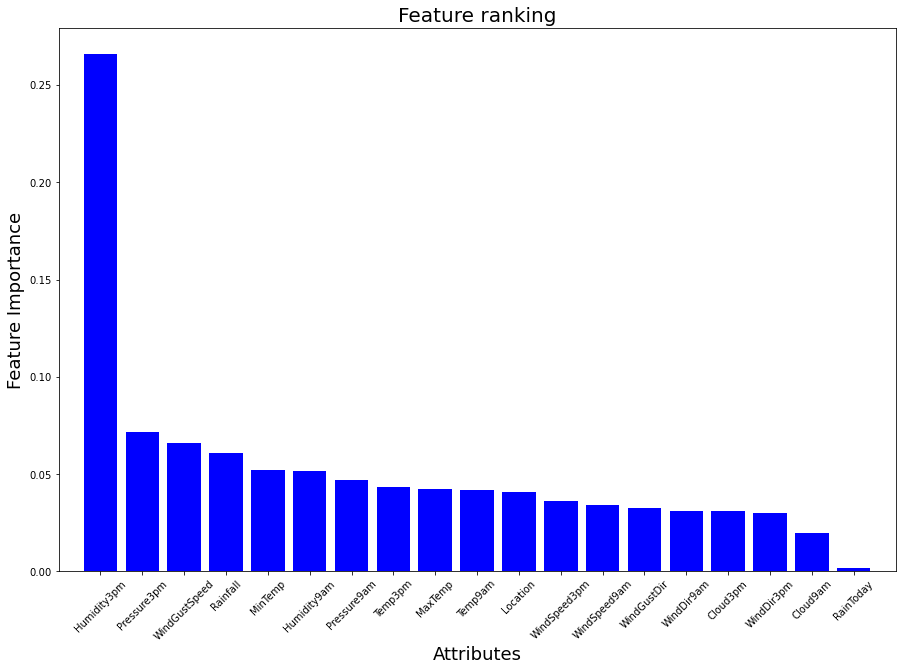

In [92]:
indices = np.argsort(importance)[::-1]


f, ax = plt.subplots(figsize=(15,10 ))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]), indices, rotation = 45)
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("Feature Importance", fontsize = 18)
plt.xlabel("Attributes", fontsize = 18)
feature_names = df2.columns #showing column names/attributes
feature_names2 = [feature_names[i] for i in indices]
plt.xticks(range(x_train.shape[1]), feature_names2)

First Drop



In [106]:

df3= df2.drop([ 'WindDir3pm', 'Cloud9am'], axis=1)
x_train, x_test, y_train, y_test  = train_test_split( df3, Y,  test_size=0.25, random_state=2)

print('x_test = ' + str(x_test) )

x_test =         Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
27951         34     19.9     24.9       0.4            9           26.0   
57687          6     -2.6     13.5       0.2           12           30.0   
121721        36     10.6     16.8       0.0            7           50.0   
116392        32     11.6     25.6       0.0            2           61.0   
58781          6     10.7     37.3       0.0           12           57.0   
...          ...      ...      ...       ...          ...            ...   
34105         38      9.0     19.7       3.4           14           31.0   
85592          8     23.0     32.6      16.8            1           31.0   
137829        13     24.3     32.7      23.2            1           57.0   
61461         35     17.6     32.8       0.0           10           61.0   
92981         39     27.7     36.0       0.0           15           39.0   

        WindDir9am  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
27

In [94]:
print("\n\nDecision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix( y_test, y_predicted))
importance = dtree.feature_importances_
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
	print('Feature: %0d, FName: %15s, Score: %.5f' % (i,df3.columns[i], v) )
	# print('Feature: %0d, Score: %.5f' % (i,v))
    
#importance score = Score is saying that that feature is being used X percent of the time



Decision Tree:
DecisionTree confusion matrix:
[[23410  4102]
 [ 3801  4236]]
decision tree dtree feature importance:
Feature: 0, FName:        Location, Score: 0.04172
Feature: 1, FName:         MinTemp, Score: 0.05681
Feature: 2, FName:         MaxTemp, Score: 0.04614
Feature: 3, FName:        Rainfall, Score: 0.06475
Feature: 4, FName:     WindGustDir, Score: 0.03632
Feature: 5, FName:   WindGustSpeed, Score: 0.06808
Feature: 6, FName:      WindDir9am, Score: 0.03352
Feature: 7, FName:    WindSpeed9am, Score: 0.03829
Feature: 8, FName:    WindSpeed3pm, Score: 0.03895
Feature: 9, FName:     Humidity9am, Score: 0.05055
Feature: 10, FName:     Humidity3pm, Score: 0.26811
Feature: 11, FName:     Pressure9am, Score: 0.05226
Feature: 12, FName:     Pressure3pm, Score: 0.07464
Feature: 13, FName:        Cloud3pm, Score: 0.03488
Feature: 14, FName:         Temp9am, Score: 0.04688
Feature: 15, FName:         Temp3pm, Score: 0.04656
Feature: 16, FName:       RainToday, Score: 0.00154


In [95]:
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussinaNB feature importance:")
print(imps.importances_mean)

#NB feature importance states that if you shuffle the values for X attribute then that percent of the time is making 
#things worse (Higher Value means higher importance)



GausianNB:

confusion_matrix from Gaussian naive bayes:
[[24416  3096]
 [ 3736  4301]]
accuracy = 0.8078145658105713
gaussinaNB feature importance:
[-7.87645222e-05  6.13238066e-04 -2.05350361e-03  1.14883682e-02
 -5.06343357e-04  3.93260007e-03 -1.10270331e-03 -1.68781119e-04
 -7.59515036e-04  4.33204872e-04  1.57641565e-02  2.43607415e-03
  3.62879406e-03  3.74131480e-03 -2.19415455e-04 -1.67093308e-03
 -3.05493825e-03]


([<matplotlib.axis.XTick at 0x205bcef0af0>,
 [Text(0, 0, 'Humidity3pm'),
  Text(1, 0, 'Pressure3pm'),
  Text(2, 0, 'WindGustSpeed'),
  Text(3, 0, 'Rainfall'),
  Text(4, 0, 'MinTemp'),
  Text(5, 0, 'Pressure9am'),
  Text(6, 0, 'Humidity9am'),
  Text(7, 0, 'Temp9am'),
  Text(8, 0, 'Temp3pm'),
  Text(9, 0, 'MaxTemp'),
  Text(10, 0, 'Location'),
  Text(11, 0, 'WindSpeed3pm'),
  Text(12, 0, 'WindSpeed9am'),
  Text(13, 0, 'WindGustDir'),
  Text(14, 0, 'Cloud3pm'),
  Text(15, 0, 'WindDir9am'),
  Text(16, 0, 'RainToday')])

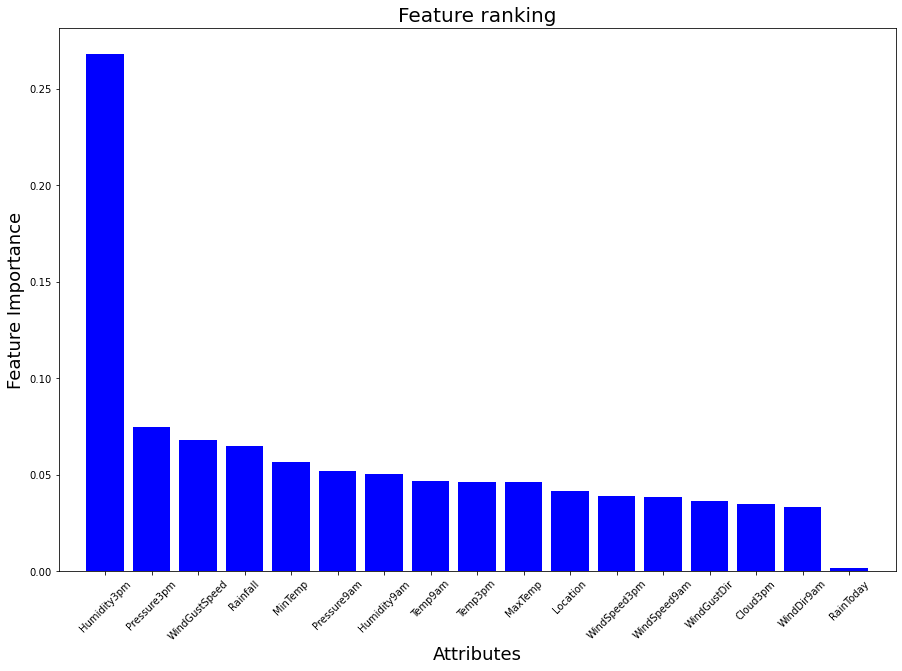

In [96]:
indices = np.argsort(importance)[::-1]


f, ax = plt.subplots(figsize=(15,10 ))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]), indices, rotation = 45)
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("Feature Importance", fontsize = 18)
plt.xlabel("Attributes", fontsize = 18)
feature_names = df3.columns #showing column names/attributes
feature_names2 = [feature_names[i] for i in indices]
plt.xticks(range(x_train.shape[1]), feature_names2)

Second Drop

In [108]:
df4= df3.drop([ 'MaxTemp', 'WindDir9am'], axis=1)
x_train, x_test, y_train, y_test  = train_test_split( df4, Y,  test_size=0.25, random_state=2)

print('x_test = ' + str(x_test) )

x_test =         Location  MinTemp  Rainfall  WindGustDir  WindGustSpeed  WindSpeed9am  \
27951         34     19.9       0.4            9           26.0           7.0   
57687          6     -2.6       0.2           12           30.0           9.0   
121721        36     10.6       0.0            7           50.0          19.0   
116392        32     11.6       0.0            2           61.0          37.0   
58781          6     10.7       0.0           12           57.0          11.0   
...          ...      ...       ...          ...            ...           ...   
34105         38      9.0       3.4           14           31.0          19.0   
85592          8     23.0      16.8            1           31.0          13.0   
137829        13     24.3      23.2            1           57.0          17.0   
61461         35     17.6       0.0           10           61.0           6.0   
92981         39     27.7       0.0           15           39.0          19.0   

        WindSpeed3

In [109]:
print("\n\nDecision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix( y_test, y_predicted))
importance = dtree.feature_importances_
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
	print('Feature: %0d, FName: %15s, Score: %.5f' % (i,df4.columns[i], v) )
	# print('Feature: %0d, Score: %.5f' % (i,v))
    
#importance score = Score is saying that that feature is being used X percent of the time



Decision Tree:
DecisionTree confusion matrix:
[[23443  4069]
 [ 3760  4277]]
decision tree dtree feature importance:
Feature: 0, FName:        Location, Score: 0.04445
Feature: 1, FName:         MinTemp, Score: 0.06223
Feature: 2, FName:        Rainfall, Score: 0.06704
Feature: 3, FName:     WindGustDir, Score: 0.04178
Feature: 4, FName:   WindGustSpeed, Score: 0.07066
Feature: 5, FName:    WindSpeed9am, Score: 0.04314
Feature: 6, FName:    WindSpeed3pm, Score: 0.04494
Feature: 7, FName:     Humidity9am, Score: 0.05904
Feature: 8, FName:     Humidity3pm, Score: 0.27189
Feature: 9, FName:     Pressure9am, Score: 0.05747
Feature: 10, FName:     Pressure3pm, Score: 0.08313
Feature: 11, FName:        Cloud3pm, Score: 0.03520
Feature: 12, FName:         Temp9am, Score: 0.05854
Feature: 13, FName:         Temp3pm, Score: 0.05914
Feature: 14, FName:       RainToday, Score: 0.00136


In [110]:
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussinaNB feature importance:")
print(imps.importances_mean)

#NB feature importance states that if you shuffle the values for X attribute then that percent of the time is making 
#things worse (Higher Value means higher importance)



GausianNB:

confusion_matrix from Gaussian naive bayes:
[[24589  2923]
 [ 3803  4234]]
accuracy = 0.8107963655799038
gaussinaNB feature importance:
[-7.87645222e-05  4.05074686e-04  1.12689527e-02 -4.38830909e-04
  4.06199893e-03 -3.03806014e-04 -5.28847506e-04  2.28417114e-03
  1.78570424e-02  2.72862809e-03  4.16889364e-03  6.01423387e-03
 -3.54440350e-04  7.87645222e-05 -1.54716026e-03]


([<matplotlib.axis.XTick at 0x205b527e2e0>,
 [Text(0, 0, 'Humidity3pm'),
  Text(1, 0, 'Pressure3pm'),
  Text(2, 0, 'WindGustSpeed'),
  Text(3, 0, 'Rainfall'),
  Text(4, 0, 'MinTemp'),
  Text(5, 0, 'Temp3pm'),
  Text(6, 0, 'Humidity9am'),
  Text(7, 0, 'Temp9am'),
  Text(8, 0, 'Pressure9am'),
  Text(9, 0, 'WindSpeed3pm'),
  Text(10, 0, 'Location'),
  Text(11, 0, 'WindSpeed9am'),
  Text(12, 0, 'WindGustDir'),
  Text(13, 0, 'Cloud3pm'),
  Text(14, 0, 'RainToday')])

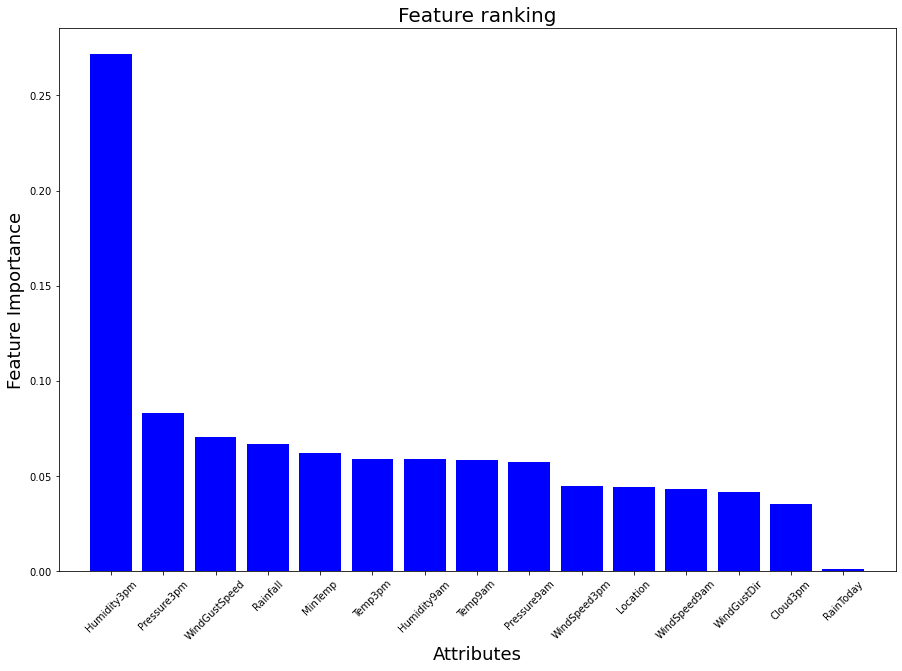

In [111]:
indices = np.argsort(importance)[::-1]


f, ax = plt.subplots(figsize=(15,10 ))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]), indices, rotation = 45)
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("Feature Importance", fontsize = 18)
plt.xlabel("Attributes", fontsize = 18)
feature_names = df4.columns #showing column names/attributes
feature_names2 = [feature_names[i] for i in indices]
plt.xticks(range(x_train.shape[1]), feature_names2)

Third Drop

In [130]:
df5= df4.drop([ 'WindGustDir','WindSpeed3pm', 'RainToday'], axis=1)
x_train, x_test, y_train, y_test  = train_test_split( df5, Y,  test_size=0.25, random_state=2)

print('x_test = ' + str(x_test) )



x_test =         Location  MinTemp  Rainfall  WindGustSpeed  WindSpeed9am  Humidity9am  \
27951         34     19.9       0.4           26.0           7.0         81.0   
57687          6     -2.6       0.2           30.0           9.0         63.0   
121721        36     10.6       0.0           50.0          19.0         77.0   
116392        32     11.6       0.0           61.0          37.0         40.0   
58781          6     10.7       0.0           57.0          11.0         30.0   
...          ...      ...       ...            ...           ...          ...   
34105         38      9.0       3.4           31.0          19.0         93.0   
85592          8     23.0      16.8           31.0          13.0         69.0   
137829        13     24.3      23.2           57.0          17.0         72.0   
61461         35     17.6       0.0           61.0           6.0         56.0   
92981         39     27.7       0.0           39.0          19.0         51.0   

        Humidity3p

In [131]:
print("\n\nDecision Tree:")
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train,y_train)
y_predicted = dtree.predict(x_test)
print('DecisionTree confusion matrix:')
print(confusion_matrix( y_test, y_predicted))
importance = dtree.feature_importances_
print("decision tree dtree feature importance:")
for i,v in enumerate(importance):
	print('Feature: %0d, FName: %15s, Score: %.5f' % (i,df5.columns[i], v) )
	# print('Feature: %0d, Score: %.5f' % (i,v))
    
#importance score = Score is saying that that feature is being used X percent of the time



Decision Tree:
DecisionTree confusion matrix:
[[23477  4035]
 [ 3787  4250]]
decision tree dtree feature importance:
Feature: 0, FName:        Location, Score: 0.05505
Feature: 1, FName:         MinTemp, Score: 0.07540
Feature: 2, FName:        Rainfall, Score: 0.07127
Feature: 3, FName:   WindGustSpeed, Score: 0.07752
Feature: 4, FName:    WindSpeed9am, Score: 0.05097
Feature: 5, FName:     Humidity9am, Score: 0.06798
Feature: 6, FName:     Humidity3pm, Score: 0.27723
Feature: 7, FName:     Pressure9am, Score: 0.06428
Feature: 8, FName:     Pressure3pm, Score: 0.08731
Feature: 9, FName:        Cloud3pm, Score: 0.03637
Feature: 10, FName:         Temp9am, Score: 0.06766
Feature: 11, FName:         Temp3pm, Score: 0.06898


In [132]:
print("\n\nGausianNB:")
model = GaussianNB()
model.fit(x_train,y_train)
gausianNB_predicted = model.predict(x_test)
print('\nconfusion_matrix from Gaussian naive bayes:')
print(confusion_matrix( y_test, gausianNB_predicted ) )
accuracy = accuracy_score(y_test, gausianNB_predicted)
print('accuracy = ' + str(accuracy))
imps = permutation_importance(model, x_test, y_test)
print("gaussinaNB feature importance:")
print(imps.importances_mean)

#NB feature importance states that if you shuffle the values for X attribute then that percent of the time is making 
#things worse (Higher Value means higher importance)



GausianNB:

confusion_matrix from Gaussian naive bayes:
[[25421  2091]
 [ 4110  3927]]
accuracy = 0.8255647134940505
gaussinaNB feature importance:
[ 0.          0.0008214   0.01827337  0.00617176 -0.00124898  0.00609862
  0.02755633  0.00149653  0.00243607  0.00845031  0.0001294   0.00270612]


([<matplotlib.axis.XTick at 0x205b58bdc40>,
 [Text(0, 0, 'Humidity3pm'),
  Text(1, 0, 'Pressure3pm'),
  Text(2, 0, 'WindGustSpeed'),
  Text(3, 0, 'MinTemp'),
  Text(4, 0, 'Rainfall'),
  Text(5, 0, 'Temp3pm'),
  Text(6, 0, 'Humidity9am'),
  Text(7, 0, 'Temp9am'),
  Text(8, 0, 'Pressure9am'),
  Text(9, 0, 'Location'),
  Text(10, 0, 'WindSpeed9am'),
  Text(11, 0, 'Cloud3pm')])

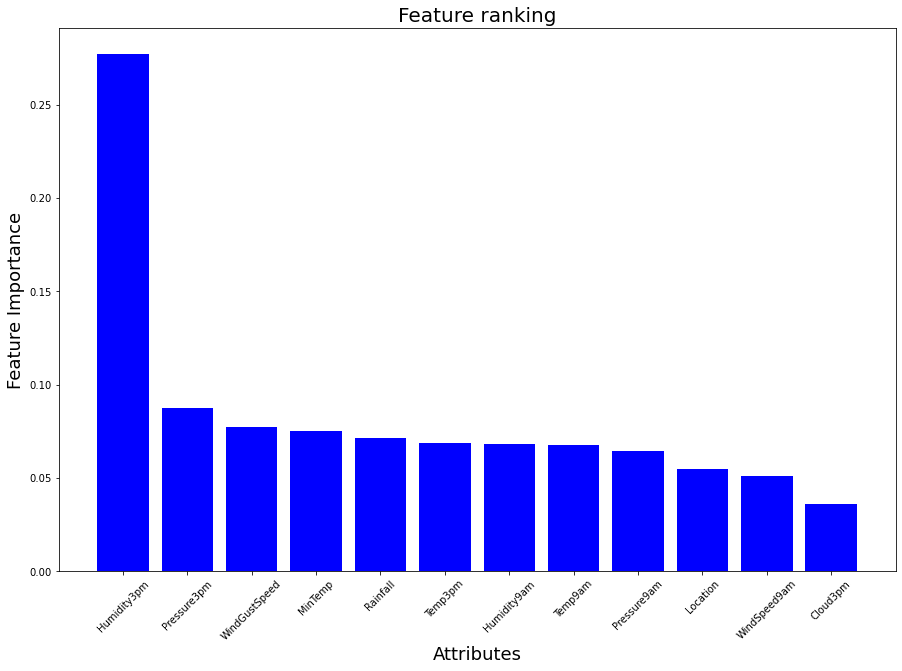

In [133]:
indices = np.argsort(importance)[::-1]


f, ax = plt.subplots(figsize=(15,10 ))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(x_train.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(x_train.shape[1]), indices, rotation = 45)
plt.xlim([-1, x_train.shape[1]])
plt.ylabel("Feature Importance", fontsize = 18)
plt.xlabel("Attributes", fontsize = 18)
feature_names = df5.columns #showing column names/attributes
feature_names2 = [feature_names[i] for i in indices]
plt.xticks(range(x_train.shape[1]), feature_names2)